We can start building a model using the data we've created from the previous session.

In [1]:
import pandas as pd
from sklearn import tree

In [2]:
train_df = pd.read_csv("../data/Titanic/train_processed.csv")

In [3]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_numeric,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1


### Prepare the data for training

The first step is to separate the training data (all the features) from the target (survival).

In [4]:
y = train_df['Survived']
x = train_df.drop(['Survived'], axis=1)

In [5]:
x.shape, y.shape

((889, 9), (889,))

Like we have discussed before, we need to split data into train/valid/test datasets. Here we need to split our training data into train/valid so we can evaluate our model performance on the validation dataset. 

You can do it by randomly setting aside 20% of data. Scikit-learn also provides a handy function for doing that.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)

In [8]:
X_train.shape, X_valid.shape

((711, 9), (178, 9))

### Training process

In [9]:
??tree.DecisionTreeClassifier

Init signature:
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Source:        
class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose th

Let's start by build a shallow tree

In [10]:
model_0 = tree.DecisionTreeClassifier(max_depth = 2)

In [11]:
model_0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [22]:
y_pred = model_0.predict(X_valid)

In [23]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0])

In [15]:
y_valid

140    1
866    0
355    1
4      0
205    0
      ..
345    1
845    0
86     0
144    0
516    0
Name: Survived, Length: 178, dtype: int64

In [16]:
train_pred =model_0.predict(X_train)

In [17]:
len(train_pred)

711

### Visualizing the tree

In [27]:
r = tree.export_text(model_0, feature_names=list(x.columns))

In [28]:
print(r)

|--- Sex_numeric <= 0.50
|   |--- Age <= 6.50
|   |   |--- class: 1
|   |--- Age >  6.50
|   |   |--- class: 0
|--- Sex_numeric >  0.50
|   |--- Pclass <= 2.50
|   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- class: 0



[Text(0.5, 0.8333333333333334, 'Sex_numeric <= 0.5\ngini = 0.472\nsamples = 711\nvalue = [439, 272]'),
 Text(0.25, 0.5, 'Age <= 6.5\ngini = 0.313\nsamples = 463\nvalue = [373, 90]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.288\nsamples = 447\nvalue = [369, 78]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\ngini = 0.391\nsamples = 248\nvalue = [66, 182]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.113\nsamples = 133\nvalue = [8, 125]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 115\nvalue = [58, 57]')]

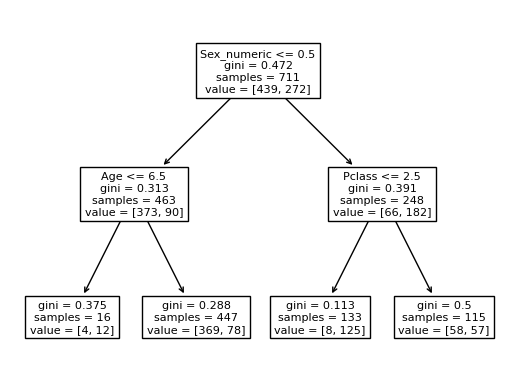

In [29]:
tree.plot_tree(model_0, feature_names=list(x.columns))

### Evaluting the model performance

In [30]:
import numpy as np

In [31]:
scores = pd.DataFrame({'pred': y_pred, 'label': y_valid})

In [33]:
## TP
scores['TP'] = np.where( ((scores['pred'] == 1) & (scores['label'] == 1)), 1, 0)

In [35]:
## TN
scores['TN'] = np.where( ((scores['pred'] == 0) & (scores['label'] == 0)), 1, 0)
## FN
scores['FN'] = np.where( ((scores['pred'] == 0) & (scores['label'] == 1)), 1, 0)
## FN
scores['FP'] = np.where( ((scores['pred'] == 1) & (scores['label'] == 0)), 1, 0)


In [36]:
scores.head()

,pred,label,TP,TN,FN,FP
140,0,1,0,0,1,0
866,0,0,0,1,0,0
355,1,1,1,0,0,0
4,0,0,0,1,0,0
205,0,0,0,1,0,0


In [37]:
# precision
precision = scores['TP'].sum()/ (scores['TP'].sum() + scores['FP'].sum())

In [38]:
#recall
recall = scores['TP'].sum()/ (scores['TP'].sum() + scores['FN'].sum())

In [39]:
precision, recall

(0.8837209302325582, 0.5588235294117647)

In [40]:
f1 = 2 * precision * recall/ (precision + recall)

In [41]:
# accuracy
accuracy = (scores['TP'].sum() + scores['TN'].sum()) / len(scores)

In [42]:
accuracy

0.8033707865168539

Scikit-learn also has built-in functions that we can use

In [43]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [44]:
accuracy_score(y_valid, y_pred)

0.8033707865168539

In [46]:
precision_recall_fscore_support(y_valid, y_pred, average='binary')

(0.8837209302325582, 0.5588235294117647, 0.6846846846846847, None)

In [49]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, train_pred, average='binary')
print(f"performance on the training dataset is: {precision_train}, {recall_train}, {f1_train}")

precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(f"performance on the test dataset is: {precision}, {recall}, {f1}")

performance on the training dataset is: 0.9194630872483222, 0.5036764705882353, 0.65083135391924
performance on the test dataset is: 0.8837209302325582, 0.5588235294117647, 0.6846846846846847


### Try other hyperparameters

First let's make the tree more complex by adding one more level

In [51]:
model_1 = tree.DecisionTreeClassifier(max_depth=4)

In [52]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [53]:
y_pred = model_1.predict(X_valid)
train_pred = model_1.predict(X_train)

In [54]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, train_pred, average='binary')
print(f"performance on the training dataset is: {precision_train}, {recall_train}, {f1_train}")

precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(f"performance on the test dataset is: {precision}, {recall}, {f1}")

performance on the training dataset is: 0.8407079646017699, 0.6985294117647058, 0.7630522088353414
performance on the test dataset is: 0.8103448275862069, 0.6911764705882353, 0.746031746031746


Then let's make the tree even more complex

In [55]:
model_2 = tree.DecisionTreeClassifier(max_depth=8)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [56]:
y_pred = model_2.predict(X_valid)
train_pred = model_2.predict(X_train)

In [57]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, train_pred, average='binary')
print(f"performance on the training dataset is: {precision_train}, {recall_train}, {f1_train}")

precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(f"performance on the test dataset is: {precision}, {recall}, {f1}")

performance on the training dataset is: 0.9377777777777778, 0.7757352941176471, 0.8490945674044266
performance on the test dataset is: 0.8958333333333334, 0.6323529411764706, 0.7413793103448276


### Grid search to find the best hyperparameters

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {'max_depth': [2, 4, 8], 'min_samples_split': [2, 4]}

In [60]:
model = tree.DecisionTreeClassifier()

In [71]:
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='precision')

In [72]:
grid_search.fit(x, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 8], 'min_samples_split': [2, 4]},
             scoring='precision')

In [73]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_split': 2}